In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
r = readers.CollectionReader('../src/npg_approx/agents/')

100%|██████████| 8/8 [00:01<00:00,  5.61it/s]


In [3]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [6]:
games = ["HalfCheetah-v2", "Walker2d-v2", "Humanoid-v2", "Hopper-v2"]
code_level_opts = {
      'kl_npg_form': [True],
      'kl_penalty_direction': ['new_to_old', 'old_to_new']
}

NUM_BINS = 20

In [7]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

# Plot mean rewards

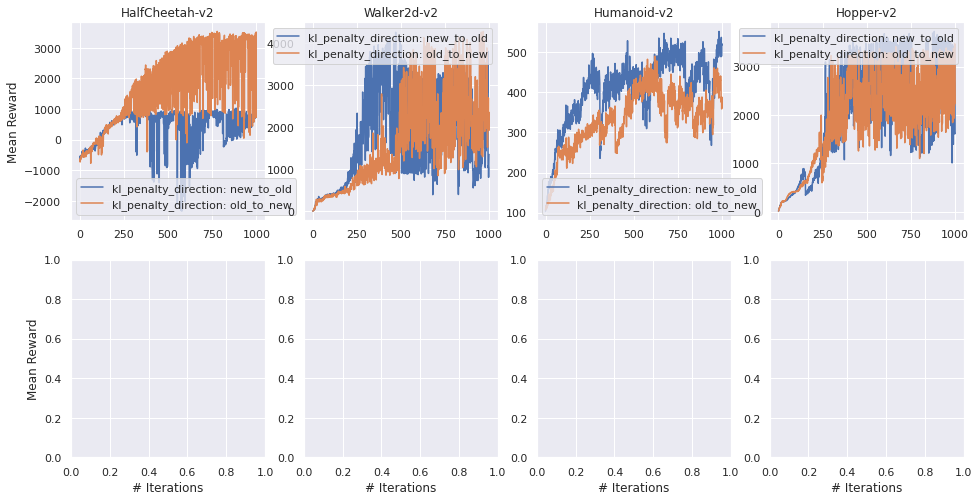

In [9]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

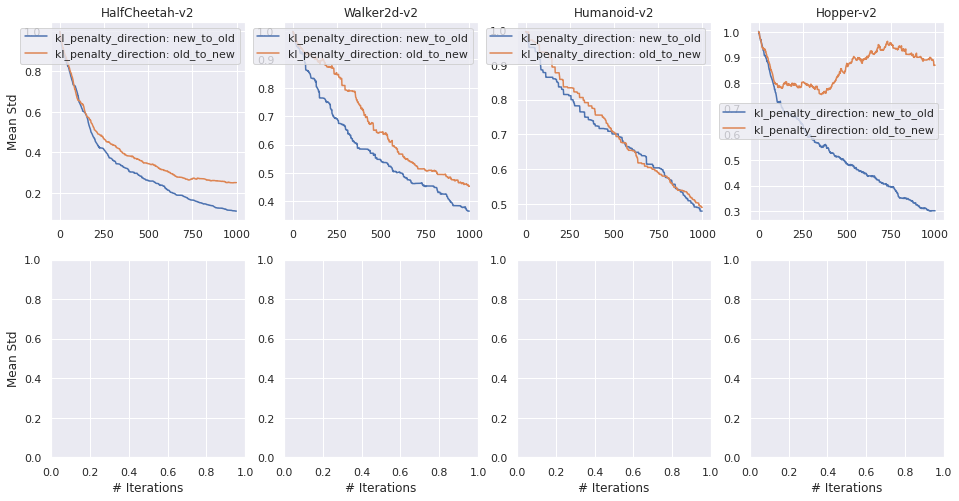

In [10]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
        sns.lineplot(filt.opt_step, filt.mean_std, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Std')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

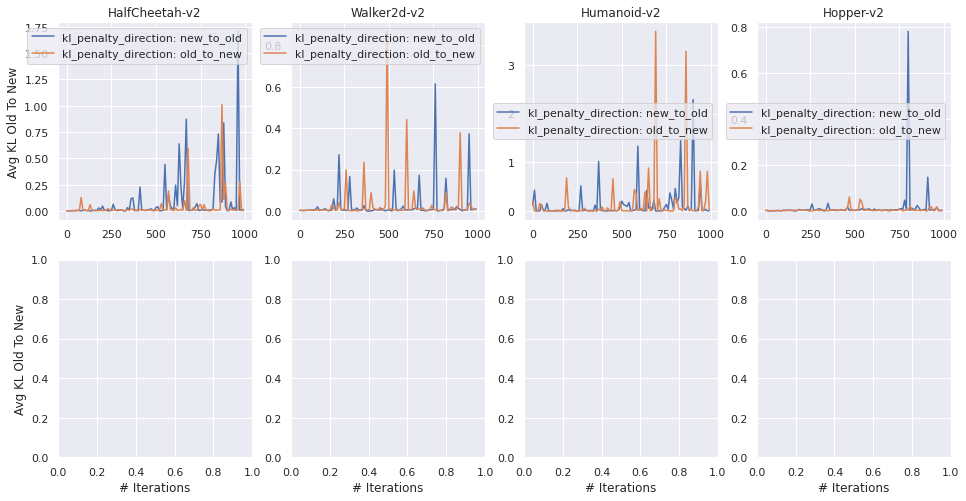

In [11]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = constraints_heldout[(constraints_heldout[cl_opt] == b) & (constraints_heldout.game == g)]
        sns.lineplot(filt.opt_step, filt.avg_kl_old_to_new, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Avg KL Old To New')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()

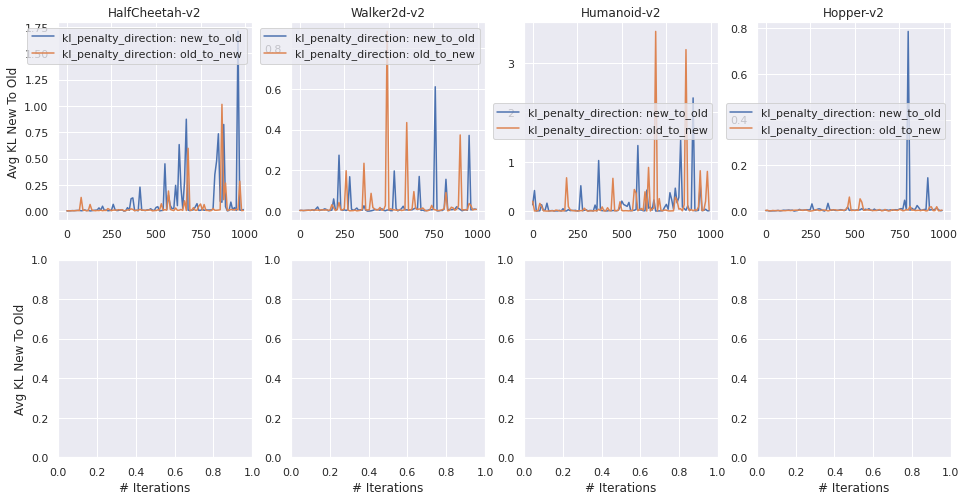

In [12]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    cl_opt = 'kl_penalty_direction'
    for b in code_level_opts[cl_opt]:
        filt = constraints_heldout[(constraints_heldout[cl_opt] == b) & (constraints_heldout.game == g)]
        sns.lineplot(filt.opt_step, filt.avg_kl_new_to_old, n_boot=100,
                     ax=ax.flatten()[j], label=f"{cl_opt}: {b}")
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Avg KL New To Old')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
plt.show()